The goal of this project is to classify argumentative elements in student writing as "effective," "adequate," or "ineffective." We created a model trained on data that is representative of the 6th-12th grade population in the United States in order to minimize bias. The model developed will help pave the way for students to receive enhanced feedback on their argumentative writing. With automated guidance, students can complete more assignments and ultimately become more confident, proficient writers.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

Getting the paths of the files in the dataset

In [4]:
# The code lists and prints the paths of all CSV files in the specified directory and its subdirectories.
# For each file with a '.csv' extension, it prints the directory, filename, and the full path of the CSV file.

for dir, file, filenames in os.walk('/content/drive/MyDrive/Feedback_Predicting_Effective_arguments'):
    for name in filenames:
        if name.endswith('.csv'):
            print(f'{dir} + {name}')
            print(os.path.join(dir, name))

/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness + test.csv
/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/test.csv
/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness + sample_submission.csv
/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/sample_submission.csv
/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness + train.csv
/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/train.csv


Loading the dataset

In [5]:
train = pd.read_csv("/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/sample_submission.csv")

Exploratory Data Analysis

In [6]:
# print(train)
print(train.shape)
# print(train.head)
print(train.columns)

(36765, 5)
Index(['discourse_id', 'essay_id', 'discourse_text', 'discourse_type',
       'discourse_effectiveness'],
      dtype='object')


In [7]:
print(test.head)
print(test.shape)
print(test.columns)

<bound method NDFrame.head of    discourse_id      essay_id  \
0  a261b6e14276  D72CB1C11673   
1  5a88900e7dc1  D72CB1C11673   
2  9790d835736b  D72CB1C11673   
3  75ce6d68b67b  D72CB1C11673   
4  93578d946723  D72CB1C11673   
5  2e214524dbe3  D72CB1C11673   
6  84812fc2ab9f  D72CB1C11673   
7  c668ff840720  D72CB1C11673   
8  739a6d00f44a  D72CB1C11673   
9  bcfae2c9a244  D72CB1C11673   

                                      discourse_text        discourse_type  
0  Making choices in life can be very difficult. ...                  Lead  
1  Seeking multiple opinions can help a person ma...              Position  
2                     it can decrease stress levels                  Claim  
3             a great chance to learn something new                  Claim  
4               can be very helpful and beneficial.                  Claim  
5  When making a decision there is a chance that ...              Evidence  
6  Everyone is different and may have more experi...              E

Finding the missing values if any in the data.

In [8]:
# The function returns a list of tuples where each tuple contains the name of a column
# and the count of missing (NaN or null) values in that column.
# The list is sorted in descending order based on the count of missing values.

def missing_values(dataframe):
    tuple_list = []
    for col in dataframe.columns:
        # print(col)
        missing_count = dataframe[col].isna().sum()
        if missing_count > 0:
            tuple_list.append(tuple([col, missing_count]))
    tuple_list = sorted(tuple_list, key=lambda x: x[1], reverse=True)
    return tuple_list

In [9]:
print(missing_values(train))

[]


Discourse Plot

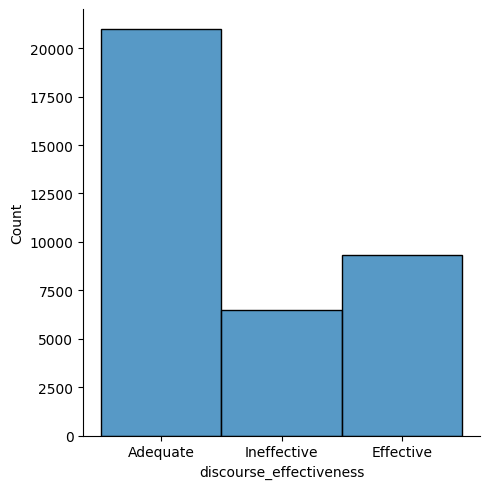

In [10]:
sb.displot(train['discourse_effectiveness'])

Substituing the text target variable to numerical variable

In [11]:
train['discourse_effectiveness'] = train['discourse_effectiveness'].replace({'Adequate':2,'Ineffective':3,'Effective':1})

In [12]:
print(train['discourse_effectiveness'].value_counts())
print(train['discourse_effectiveness'].value_counts() / len(train['discourse_effectiveness']))

2    20977
1     9326
3     6462
Name: discourse_effectiveness, dtype: int64
2    0.570570
1    0.253665
3    0.175765
Name: discourse_effectiveness, dtype: float64


Reading the discourse essay text from the text file

In [15]:
def read_discourse_paper_train():
    return train['essay_id'].apply(lambda x: open(f'/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/train/{x}.txt').read())
def read_discourse_paper_test():
    return test['essay_id'].apply(lambda x: open(f'/content/drive/MyDrive/Feedback_Predicting_Effective_arguments/feedback-prize-effectiveness/test/{x}.txt').read())

In [17]:
train['discourse_paper'] = read_discourse_paper_train()
print(train['discourse_paper'][10])
test['discourse_paper'] = read_discourse_paper_test()
print(train.shape)
print(train.columns)
print(test.columns)
print(test.shape)

Limiting the usage of cars has personal and professional support all across the globe and yet it has yet to be embraced everywhere. Statistical proof show where it may help and real life examples of some of the effects of reducing, or getting rid of altogether, cars in one's daily life. While "recent studies suggest that Americans are buying fewer cars, driving less and getting fewer licenses as each year goes by" (Source 4), is that really enough or for the right reason? There are plenty of reasons to stop, or limit, the amount of cars being driven on the roads for every kind of person, from the hippie to the businessman, from the mom to the college student. With so many things in this world that few people agree on, this is a nice change to see in regards the removal of so many cars. Why would they all agree, one might ask. Well, there are plenty of reasons.

For starters, stress. It is no secret that morning traffic jams and 5'o'clock traffic is often enough to send any driver into 

Creating the training data.

In [18]:
target_class = train['discourse_effectiveness']
new_train = train.drop(['discourse_effectiveness'], axis=1)
print (new_train['discourse_type'].value_counts())
print(new_train['discourse_type'].value_counts()/len(new_train['discourse_type']))
print(len(new_train['discourse_paper']))

Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: discourse_type, dtype: int64
Evidence                0.329253
Claim                   0.325772
Position                0.109452
Concluding Statement    0.091146
Lead                    0.062315
Counterclaim            0.048225
Rebuttal                0.033837
Name: discourse_type, dtype: float64
36765


Text Processing

In [19]:
import nltk
# from ntlk import stopwords
import re as re
text = new_train['discourse_paper']
print(text)
print(len(text))
def clean_text(text):
    text = text.str.lower()
    text = text.replace('#', ' ')
    text = text.apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))
    return text
text = clean_text(text)
print(text)

0        Hi, i'm Isaac, i'm going to be writing about h...
1        Hi, i'm Isaac, i'm going to be writing about h...
2        Hi, i'm Isaac, i'm going to be writing about h...
3        Hi, i'm Isaac, i'm going to be writing about h...
4        Hi, i'm Isaac, i'm going to be writing about h...
                               ...                        
36760    Some people may ask multiple people for advice...
36761    Some people may ask multiple people for advice...
36762    Some people may ask multiple people for advice...
36763    Some people may ask multiple people for advice...
36764    Some people may ask multiple people for advice...
Name: discourse_paper, Length: 36765, dtype: object
36765
0        hi, i'm isaac, i'm going writing about how thi...
1        hi, i'm isaac, i'm going writing about how thi...
2        hi, i'm isaac, i'm going writing about how thi...
3        hi, i'm isaac, i'm going writing about how thi...
4        hi, i'm isaac, i'm going writing about how thi..

Dictionary of contractions for replacement

In [20]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

Converting all the contractions into their corresponding full forms.

In [21]:
def convert_shorts(text, contractions):
    for word in text.split():
        if word in contractions:
            text = text.replace(word, contractions[word])
    return text
print(text.head())
text = text.apply(lambda x: convert_shorts(x, contractions))
print(text.head())

0    hi, i'm isaac, i'm going writing about how thi...
1    hi, i'm isaac, i'm going writing about how thi...
2    hi, i'm isaac, i'm going writing about how thi...
3    hi, i'm isaac, i'm going writing about how thi...
4    hi, i'm isaac, i'm going writing about how thi...
Name: discourse_paper, dtype: object
0    hi, I am isaac, I am going writing about how t...
1    hi, I am isaac, I am going writing about how t...
2    hi, I am isaac, I am going writing about how t...
3    hi, I am isaac, I am going writing about how t...
4    hi, I am isaac, I am going writing about how t...
Name: discourse_paper, dtype: object


In [23]:
print(target_class)
print(pd.DataFrame(target_class).columns)

0        2
1        2
2        2
3        2
4        2
        ..
36760    2
36761    2
36762    2
36763    3
36764    3
Name: discourse_effectiveness, Length: 36765, dtype: int64
Index(['discourse_effectiveness'], dtype='object')


Performing One Hot Encoding

In [24]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
target_class = pd.DataFrame(target_class)
column_trans = make_column_transformer((OneHotEncoder(), ['discourse_effectiveness']), remainder='passthrough')
y = pd.DataFrame(column_trans.fit_transform(target_class), columns=column_trans.get_feature_names_out())
print(y.columns)
print(y.shape)


Index(['onehotencoder__discourse_effectiveness_1',
       'onehotencoder__discourse_effectiveness_2',
       'onehotencoder__discourse_effectiveness_3'],
      dtype='object')
(36765, 3)


In [25]:
print(y)

       onehotencoder__discourse_effectiveness_1  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
36760                                       0.0   
36761                                       0.0   
36762                                       0.0   
36763                                       0.0   
36764                                       0.0   

       onehotencoder__discourse_effectiveness_2  \
0                                           1.0   
1                                           1.0   
2                                           1.0   
3                                           1.0   
4                                           1.0   
...                                         ...   
36760                         

In [26]:
y.astype(int)

,onehotencoder__discourse_effectiveness_1,onehotencoder__discourse_effectiveness_2,onehotencoder__discourse_effectiveness_3
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
36760,0,1,0
36761,0,1,0
36762,0,1,0
36763,0,0,1


In [27]:
print(new_train['discourse_paper'][0])

Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform. On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform

I think that the face is a natural landform because there is no life on Mars that we have descovered yet. If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, "It's not easy to target Cydonia," in which he is saying that its not easy to know if it is a natural landform at this point. In all that they're saying, its probably a natural landform.

Peo

In [28]:
new_train['discourse_paper'] = text
print(new_train['discourse_paper'][20])
print(new_train['discourse_paper'][30])

should computers read the emotional expressions students classroom? because, why should computer know how your feeling? would not change the emotion the students feeling. also would not help with the students education. its over all just waste time. the process begins when the computer puts together 3-d digital model. there are major muscles your face that the computer has detect. eckman classified six emotions happiness, surprise, anger, disgust, fear, and sadness. then associated each with characteristic movements facial muscles." for example the frontalis pars lateralis muscle above your eye which shows your surpried when raised. humans alone can identify facial expressions peoples faces. you look friend you can tell how they are feeling that moment. vinci studied human anatomy help paint the facial muscles percisely the mona lisa painting. dr. huangs has new computer software stores similar info electronic code. thinks there could different type code the painting. when facial facia

TFIDF Vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=0.1)

X_train = list(map(''.join, np.array(new_train).tolist()))
X_test = list(map(''.join, np.array(test).tolist()))

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [30]:
print(X_train_tfidf.get_shape())
print(X_test_tfidf.get_shape())

(36765, 170)
(10, 170)


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=42)

X_train_new = list(map(''.join, np.array(X_train).tolist()))
X_test_new = list(map(''.join, np.array(X_test).tolist()))

X_train_tfidf_new = vectorizer.fit_transform(X_train_new)
X_test_tfidf_new = vectorizer.transform(X_test_new)

Machine Learning Model

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

model =  MultiOutputRegressor(KNeighborsRegressor())
model.fit(X_train_tfidf_new, y_train)

MultiOutputRegressor(estimator=KNeighborsRegressor())

In [37]:
print("Training Score:", model.score(X_train_tfidf_new, y_train))

Training Score: 0.46534307570314254


In [38]:
y_preds = model.predict(X_test_tfidf_new)

In [39]:
print(y_test.shape)
print(y_preds.shape)

(7353, 3)
(7353, 3)


In [41]:
%pip install yellowbrick

In [42]:
print(y_preds)

[[0.2 0.8 0. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 ...
 [0.2 0.2 0.6]
 [0.  0.8 0.2]
 [1.  0.  0. ]]


In [43]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_preds, y_test)
print(mse1)

0.15265605875152713


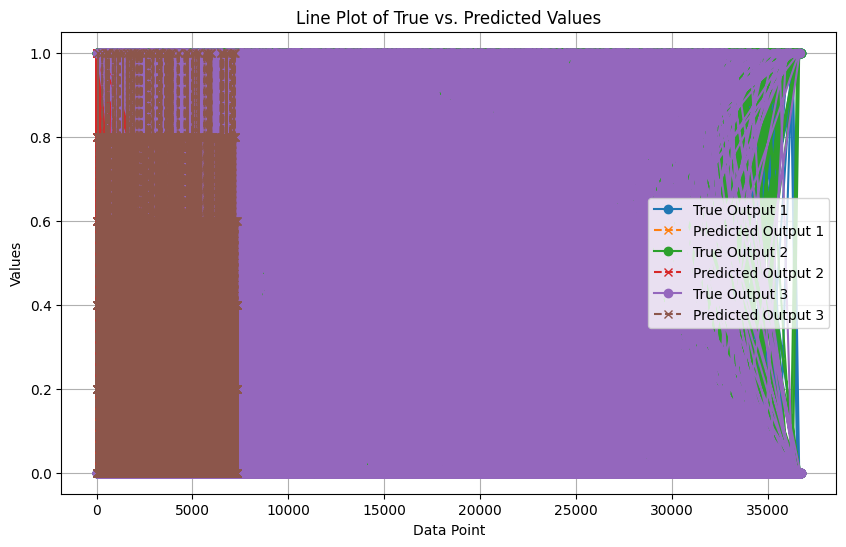

In [44]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for i in range(y_test.shape[1]):
    plt.plot(y_test.iloc[:, i], label=f'True Output {i+1}', marker='o')
    plt.plot(y_preds[:, i], label=f'Predicted Output {i+1}', linestyle='dashed', marker='x')

plt.title('Line Plot of True vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


Transfer Learning

In [ ]:
%pip install torch transformers


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import DebertaTokenizer, DebertaForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import pandas as pd
import numpy as np

f:\UC_Denver\Machine_Learning\Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Splitting the data and Tokenize it

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_train, y, test_size=0.2, random_state=42)

# Tokenize the input data
tokenizer = DebertaTokenizer.from_pretrained('microsoft/deberta-base')

In [ ]:
print(X_train, y_train)
print(X_train.columns)

       discourse_id      essay_id  \
3994   da146607809f  45C0A94A1668   
3069   16666c0dbb61  38F506B031E1   
4749   a4f3f435ea46  55B4B2BFF231   
34914  134fc7f67f8f  79662DEC0A1B   
2878   d04e6efeb6f6  3415EF8F87AA   
...             ...           ...   
16850  caeed6260f60  236ACE5E8FC3   
6265   2397326a9855  71CF98E09876   
11284  a13d92ecb5a0  CB66B685DAF6   
860    7869a0b74c1d  1037273E86D9   
15795  934f2a4f1c9e  139B1A57D6A3   

                                          discourse_text  \
3994   Its a very good sorce for people that have the...   
3069   Eveyone should have one of these or get an com...   
4749   The NASA has talked about idea like sending hu...   
34914  They will finish early and they start doing an...   
2878                                 You could have fun    
...                                                  ...   
16850  So there is a possiblity that your not going t...   
6265     Its's worth it to study and learen about venus    
11284  Your pri

In [ ]:
X_train['discourse_paper']

3994     the new technology very helpful showing about ...
3069     facial action coding system think good idea be...
4749     this passage personally think that did good jo...
34914    students can get benefit from being able atten...
2878     you should particpate the seagoing cowboys pro...
                               ...                        
16850    okay hey, just wanted introduce myself before ...
6265     the study venus the author talks about how the...
11284    your principal has decided that all students m...
860      the curiousity about mars has been going for c...
15795    the article, think that the image the "face" m...
Name: discourse_paper, Length: 29412, dtype: object

In [ ]:
train_encodings = tokenizer(X_train['discourse_paper'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test['discourse_paper'].tolist(), truncation=True, padding=True, max_length=128)

Building a Custom Dataset

In [ ]:

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['label'] = torch.tensor(self.labels[idx], dtype=torch.float32)
        return item


In [ ]:
train_labels = y_train[['onehotencoder__discourse_effectiveness_1', 'onehotencoder__discourse_effectiveness_2', 'onehotencoder__discourse_effectiveness_3']].values
test_labels = y_test[['onehotencoder__discourse_effectiveness_1', 'onehotencoder__discourse_effectiveness_2', 'onehotencoder__discourse_effectiveness_3']].values

Converting the original dataset into the CustomDataset format

In [ ]:

train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

Transformer Model

In [ ]:

model = DebertaForSequenceClassification.from_pretrained('microsoft/deberta-base', num_labels=3)

# Training
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}'):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}, Average Loss: {average_loss:.4f}')

# Testing
model.eval()
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
all_predictions = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Testing'):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = logits.cpu().numpy()
        all_predictions.extend(predictions)

# Evaluate using mean squared error
mse = mean_squared_error(test_labels, all_predictions)
print(f'Mean Squared Error: {mse:.4f}')

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'classifier.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1: 100%|██████████| 3677/3677 [5:50:33<00:00,  5.72s/it]  


Epoch 1, Average Loss: 0.9790


Epoch 2: 100%|██████████| 3677/3677 [6:14:15<00:00,  6.11s/it]    


Epoch 2, Average Loss: 0.9772


Epoch 3: 100%|██████████| 3677/3677 [6:16:33<00:00,  6.14s/it]     


Epoch 3, Average Loss: 0.9770


Testing: 100%|██████████| 920/920 [27:21<00:00,  1.78s/it]

Mean Squared Error: 0.4389


Saving the model

In [ ]:
model.save_pretrained("DeBERTamodel_essay")

In [ ]:
tokenizer.save_pretrained("DebertaTokenizer_essay")

('DebertaTokenizer_essay\\tokenizer_config.json',
 'DebertaTokenizer_essay\\special_tokens_map.json',
 'DebertaTokenizer_essay\\vocab.json',
 'DebertaTokenizer_essay\\merges.txt',
 'DebertaTokenizer_essay\\added_tokens.json')